In [7]:
!pip install wget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime
import pytz 
from collections import OrderedDict
# from google.colab import drive
#os.chdir('/content/gdrive/My Drive')
# drive.mount('/content/gdrive')

In [8]:
# os.chdir('/content/gdrive/My Drive/test')

In [9]:
if os.path.exists("test.json"):
  os.remove("test.json")
wget.download('https://api.covid19india.org/v3/data-all.json', os.getcwd()+"//test.json")

100% [........................................................................] 27645902 / 27645902

'E:\\Coronavirus\\Covidtoday.in\\backend\\testing-and-cfr//test.json'

In [10]:
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
def convert(dat): 
    return  str(dat[8:10]) + fn(str(dat[5:7]))
def convert1(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [11]:
dataset=pd.read_csv('./population.csv')
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population=population.set_index('State')

In [12]:
state_id = {
  "TT":"India",
  "MH":"Maharashtra",
  "TN":"Tamil Nadu",
  "DL":"Delhi",
  "GJ":"Gujarat",
  "RJ":"Rajasthan",
  "UP":"Uttar Pradesh",
  "MP":"Madhya Pradesh",
  "WB":"West Bengal",
  "KA":"Karnataka",
  "BR":"Bihar",
  "AP":"Andhra Pradesh",
  "HR":"Haryana",
  "TG":"Telangana",
  "JK":"Jammu and Kashmir",
  "OR":"Odisha",
  "PB":"Punjab",
  "AS":"Assam",
  "KL":"Kerala",
  "UT":"Uttarakhand",
  "JH":"Jharkhand",
  "CT":"Chhattisgarh",
  "TR":"Tripura",
  "HP":"Himachal Pradesh",
  "CH":"Chandigarh",
  "GA":"Goa",
  "MN":"Manipur",
  "NL":"Nagaland",
  "PY":"Puducherry",
  "LA":"Ladakh",
  "AR":"Arunachal Pradesh",
  "AN":"Andaman and Nicobar Islands",
  "ML":"Meghalaya",
  "MZ":"Mizoram",
  "DN":"Dadra and Nagar Haveli and Daman and Diu",
  "SK":"Sikkim",
}

In [13]:
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t

['2020-08-02',
 '2020-08-03',
 '2020-08-04',
 '2020-08-05',
 '2020-08-06',
 '2020-08-07',
 '2020-08-08']

In [28]:
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]
for x in t:
  temp = json.load(open('test.json'))[x]
  temp1 = json.load(open('positivity_Rate.json'))
  states={}
  for j in state_id.keys():
    k=state_id[j]
    print(k)
    test_per_million = temp1[k]['test_per_million']
    pos_cum = temp1[k]['cum_positive_cases']
    pos_rate_cum = temp1[k]['cum_positivity_rate']
    daily_pos = temp1[k]['daily_positive_cases']
    daily_pos_ma = temp1[k]['daily_positive_cases_ma']
    daily_pos_rate = temp1[k]['daily_positivity_rate']
    daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
    tested_cum = temp1[k]['cum_tests']
    daily_tested = temp1[k]['daily_tests']
    deceased_cum = temp1[k]['cum_deceased']
    daily_deceased = temp1[k]['daily_deceased']
    recovered_cum = temp1[k]['cum_recovered']
    daily_recovered = temp1[k]['daily_recovered'] 

    dates=temp1[k]['dates']
    if convert(x) not in dates :
      print(1)
      dates.append(convert(x))
      test_per_million.append('')
      pos_cum.append('')
      pos_rate_cum.append('')
      daily_pos.append('')
      daily_pos_ma.append('')
      daily_pos_rate.append('')
      daily_pos_rate_ma.append('')
      tested_cum.append('')
      daily_tested.append('')
      deceased_cum.append('')
      daily_deceased.append('')
      recovered_cum.append('')
      daily_recovered.append('')
      i=len(dates)-1
    for l in range(len(dates)):
      if convert(x)==dates[l]:
        i=l
        break
    

    if k in temp1.keys():
        if 'total' in temp[j].keys():
          if 'confirmed' in temp[j]['total'].keys():
            pos_cum[i]=temp[j]['total']['confirmed']

          if 'tested' in temp[j]['total'].keys():
            tested_cum[i]=abs(temp[j]['total']['tested'])
            test_per_million[i]=temp[j]['total']['tested']*1000000/int(population["Population"][k])
              
          if 'deceased' in temp[j]['total'].keys():
            deceased_cum[i]=temp[j]['total']['deceased']
          
          if 'recovered' in temp[j]['total'].keys():
            recovered_cum[i]=temp[j]['total']['recovered']
          
          if len(str(pos_cum[i])) and len(str(tested_cum[i])):
            pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

        if 'delta' in temp[j].keys():
          if 'confirmed' in temp[j]['delta'].keys():
            daily_pos[i]=temp[j]['delta']['confirmed']

          if 'tested' in temp[j]['delta'].keys():
            daily_tested[i]=abs(temp[j]['delta']['tested'])
          
          if 'deceased' in temp[j]['delta'].keys():
            daily_deceased[i]=temp[j]['delta']['deceased']
          
          if 'recovered' in temp[j]['delta'].keys():
            daily_recovered[i]=temp[j]['delta']['recovered']
          
          if len(str(daily_pos[i])) and len(str(daily_tested[i])):
            daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

    for w in range(7,len(daily_pos)):
      sum1=0
      sum2=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          sum2+=int(daily_tested[w-s])
      if (sum2!=0):
        daily_pos_rate_ma[w]=sum1*100/abs(sum2)
    
    for w in range(7,len(daily_pos)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          count+=1
      if count!=0:
        daily_pos_ma[w]=sum1/count

    st=state_id[j]
    for i in range(len(dates)):
      csv_dates.append(dates[i])
      csv_states.append(st)
      csv_total_cases.append(pos_cum[i])
      csv_positivity_rate_cumulative.append(pos_rate_cum[i])
      csv_daily_positive_cases.append(daily_pos[i])
      csv_cum_recovered.append(recovered_cum[i])
      csv_daily_recovered.append(daily_recovered[i])
      csv_cum_deceased.append(deceased_cum[i])
      csv_daily_deceased.append(daily_deceased[i])
      csv_daily_positivity_rate.append(daily_pos_rate[i])
      csv_daily_positive_cases_ma.append(daily_pos_ma[i])
      csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
      csv_daily_tested.append(daily_tested[i])
      csv_cum_tested.append(tested_cum[i])
      csv_test_per_million.append(test_per_million[i])
    #print(st)
    states[st]={
                    'dates':dates,
                    'cum_positive_cases':pos_cum,
                    'cum_positivity_rate':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'cum_recovered':recovered_cum,
                    'daily_recovered':daily_recovered,
                    'cum_deceased':deceased_cum,
                    'daily_deceased':daily_deceased,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'daily_tests': daily_tested,
                    'cum_tests': tested_cum,
                    'test_per_million':test_per_million,    
              }
  states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
  with open('positivity_Rate.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

India


TypeError: unsupported operand type(s) for -: 'list' and 'datetime.timedelta'

In [15]:
len(pos_cum)

191

In [16]:
df=pd.DataFrame()
df['dates']=csv_dates
df['state']=csv_states
df['cum_positive_cases']=csv_total_cases
df['cum_positivity_rate']=csv_positivity_rate_cumulative
df['cum_recovered']=csv_cum_recovered
df['daily_recovered']:csv_daily_recovered
df['cum_deceased']=csv_cum_deceased
df['daily_deceased']:daily_deceased
df['daily_positive_cases']=csv_daily_positive_cases
df['daily_positivity_rate']=csv_daily_positivity_rate
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma
df['daily_tests']=csv_daily_tested
df['cum_tested']=csv_cum_tested
df['test_per_million']=csv_test_per_million
df.to_csv('positivity_Rate.csv',index=False)

## CFR

In [17]:
#dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [18]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [19]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


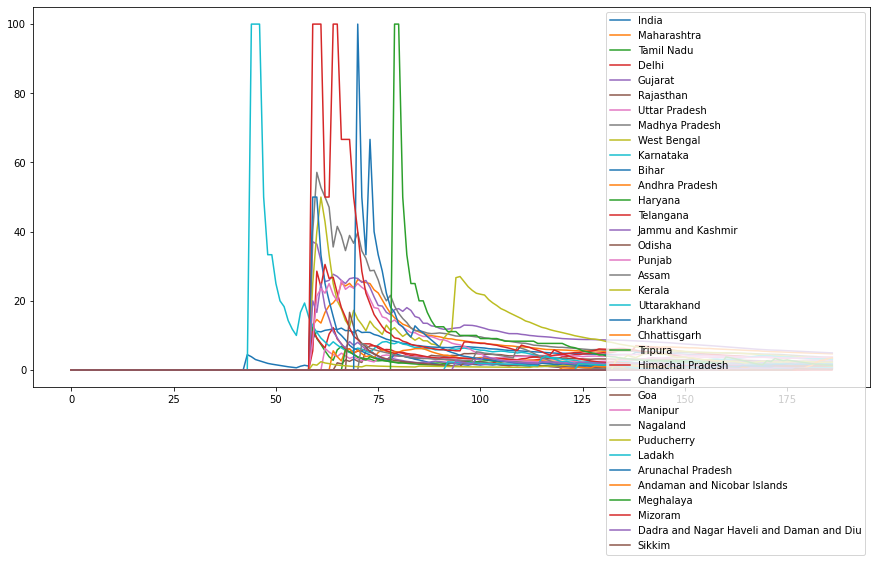

In [14]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    state=state_id[st]
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates = states[state]['dates']
    temp = {
        'dates':dates,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[st]
    #print(a)
    states[state].update(temp)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [15]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [16]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)

## Doubling Rate

In [17]:
def calc_doublingtimes(x):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1,x.shape[0]):
            if len(str(x[j])) and len(str(x[i])):
                vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
    if not vals:
        return 0,0,0
    return np.median(vals),np.quantile(vals,0.025),np.quantile(vals,0.975)

In [18]:
start=datetime.now()
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-30",end=x)
datess=[]
for i in range(len(dd)):
  datess.append((str(dd[i])[:10]))

In [19]:
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(datess[w]))

In [20]:
json_data={}
test=json.load(open('test.json'))
for j in state_id.keys():
    cumul=['']*len(dates)
    st=state_id[j]
    cumul=states[st]['cum_positive_cases']

    cumul_cases=np.array(cumul)
    dbt = np.zeros((3,cumul_cases.shape[0]))
    for i in range(cumul_cases.shape[0]):
        dbt[:,i] = calc_doublingtimes(cumul_cases[i-7:i])
    st=state_id[j]
    json_data[st] = {
            'dates':dates1,
            'dbt_point':pd.Series((list(dbt[0,:]))).fillna('').tolist(),
            'dbt_l95':pd.Series((list(dbt[1,:]))).fillna('').tolist(),
            'dbt_u95':pd.Series((list(dbt[2,:]))).fillna('').tolist()
            }
    states[st].update(json_data[st])

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


### Rt Calculation

In [21]:
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [22]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

### The BackprojNB Method 

In [ ]:
# rt = pd.DataFrame()
# # plt.figure(1, figsize=(15, 7))
# for st in state_id.keys():
#     state=state_id[st]
#     temp = pd.DataFrame()
#     temp["active"] = data_confirmed[state]
#     temp.to_csv('confirmed.csv')
#     call(['RScript.exe','scripts/boot_rt_back.R'])
#     values = {
#             'rt_point':[],
#             'rt_sd':[],
#             'rt_l95':[],
#             'rt_u95':[],
#             'rt_l50':[],
#             'rt_u50':[],
#             't_end':[]
#             }
#     for df in [pd.read_csv('rt_temp/'+temp) for temp in os.listdir('rt_temp/')]:
#         values['rt_point'].append(df['Mean(R)'])
#         values['rt_sd'].append(df['Std(R)'])
#         values['rt_l95'].append(df['Quantile.0.025(R)'])
#         values['rt_u95'].append(df['Quantile.0.975(R)'])
#         values['rt_l50'].append(df['Quantile.0.25(R)'])
#         values['rt_u50'].append(df['Quantile.0.75(R)'])
#         values['t_end'].append(df['t_end']-1)
#     for i in values:
#         values[i] = np.median(values[i],axis=0)
#     values['dates'] = list(data_confirmed['date'][values['t_end']-1])
#     rt_state=pd.DataFrame()
#     rt_state['state']=[str(state)]*len(values['dates'])
#     rt_state['dates']= values['dates']
#     rt_state['rt_point'] = values['rt_point']
#     rt_state['rt_sd'] = values['rt_sd']    
#     rt_state['rt_l95'] = values['rt_l95']    
#     rt_state['rt_u95'] = values['rt_u95']    
#     rt_state['rt_l50'] = values['rt_l50']
#     rt_state['rt_u50'] = values['rt_u50']
#     rt=pd.concat([rt, rt_state])
#     plt.plot(range(len(values['rt_point'])),values['rt_point'],label=state)
#     plt.fill_between(range(len(values['rt_point'])),values['rt_l95'],values['rt_u95'],alpha=0.5)
#     plt.ylim(0,4)
#     plt.legend()
#     plt.show()

### The Shift Method 

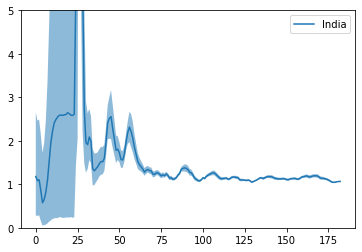

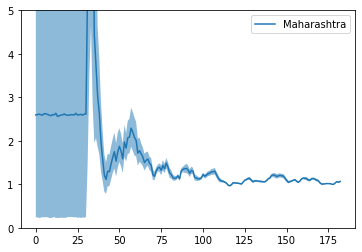

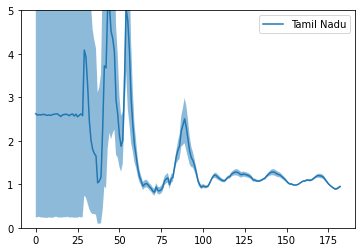

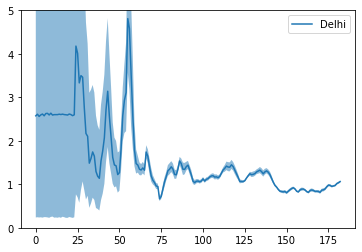

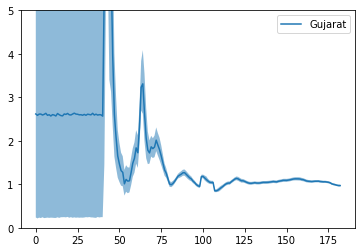

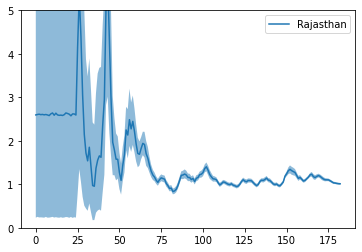

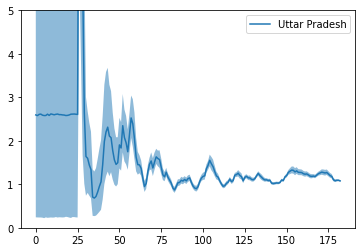

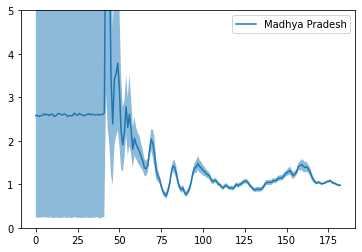

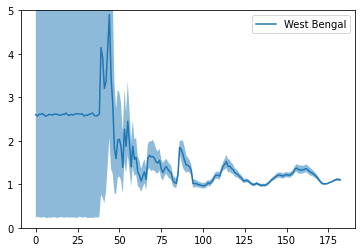

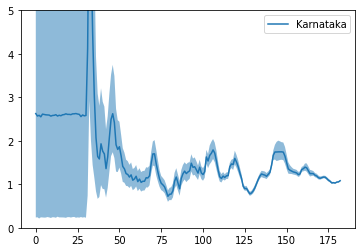

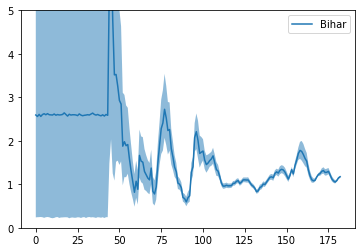

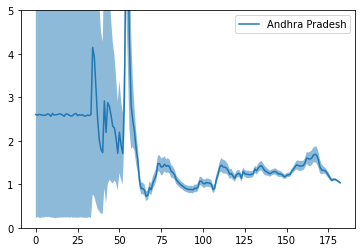

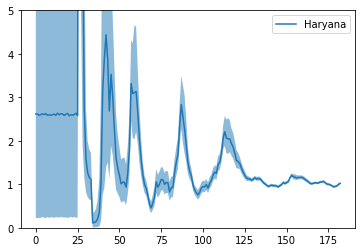

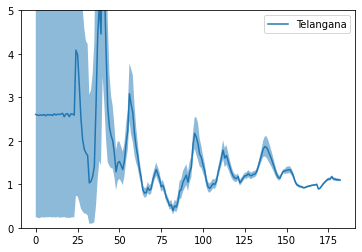

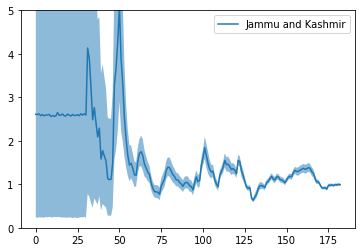

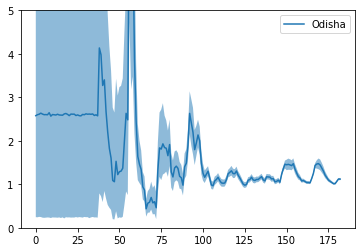

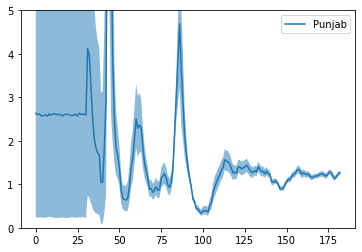

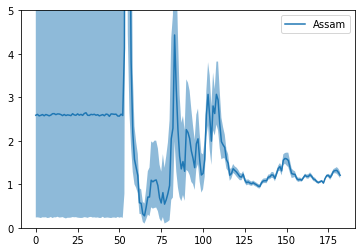

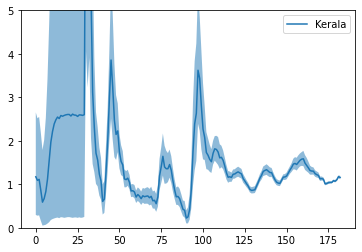

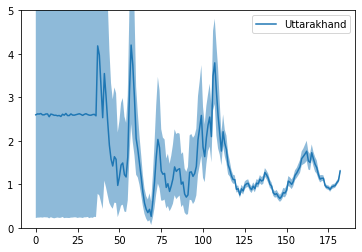

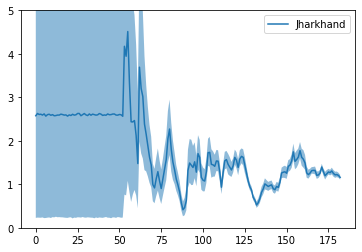

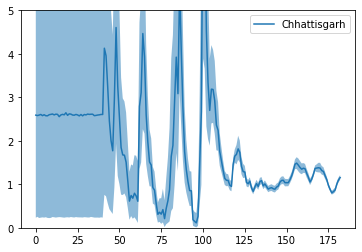

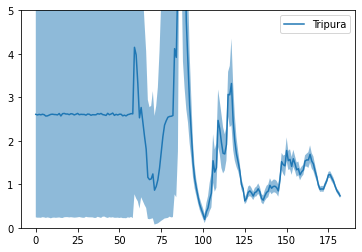

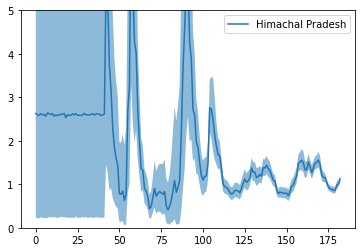

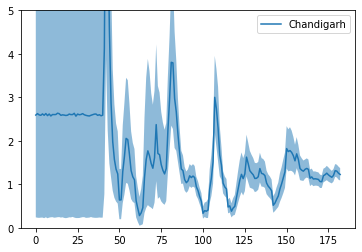

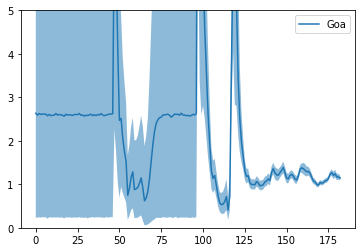

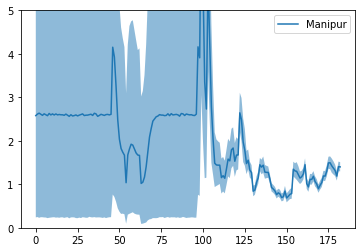

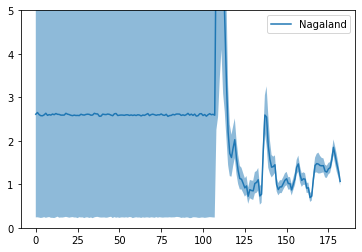

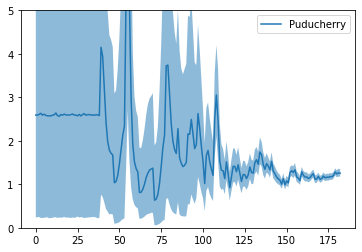

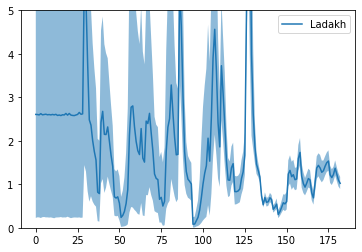

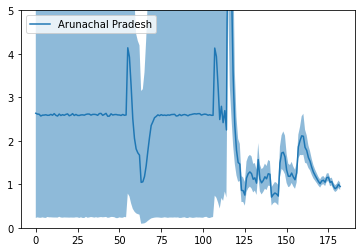

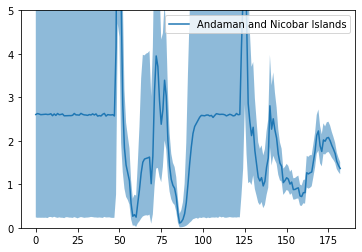

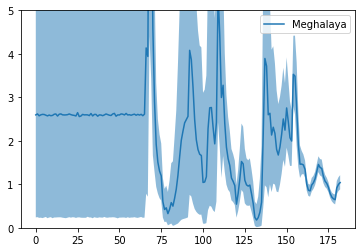

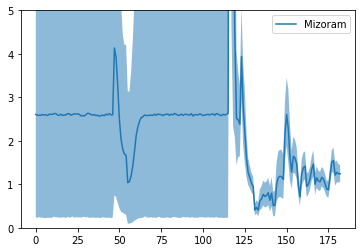

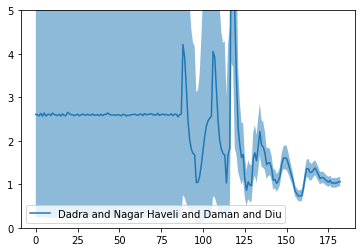

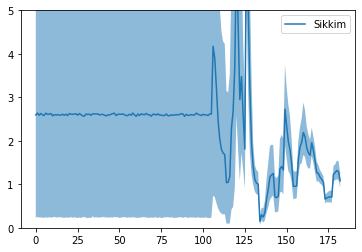

In [36]:
from datetime import timedelta
rt = pd.DataFrame()
# plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    state=state_id[st]
    temp = pd.DataFrame()
    temp["active"] = np.clip(data_confirmed[state],a_min=0,a_max=np.inf)
    temp.to_csv('confirmed.csv')
    call(['RScript.exe','scripts/Rt_analysis_newGT_TJ.R']) 
    # Use scripts/Rt_analysis.R for Science Paper Estimate
    # Use scripts/Rt_analysis_newGT.R for Singapore Estimate
    # Use scripts/Rt_analysis_newGT_TJ.R for Tianjin Estimate
    
    df = pd.read_csv('rtoutput.csv')
    dates = list(data_confirmed['date'][df['t_end'].values-1])
    rt_state=pd.DataFrame()
    rt_state['state']=[str(state)]*len(dates)
    rt_state['dates']= dates
    rt_state['rt_point'] = df['Mean(R)']
    rt_state['rt_sd'] = df['Std(R)']    
    rt_state['rt_l95'] = df['Quantile.0.025(R)']  
    rt_state['rt_u95'] = df['Quantile.0.975(R)']  
    rt_state['rt_l50'] = df['Quantile.0.25(R)']
    rt_state['rt_u50'] = df['Quantile.0.75(R)']
    rt=pd.concat([rt, rt_state])
    plt.plot(range(len(rt_state['rt_point'])),rt_state['rt_point'],label=state)
    plt.fill_between(range(len(rt_state['rt_point'])),rt_state['rt_l95'],rt_state['rt_u95'],alpha=0.5)
    plt.ylim(0,5)
    plt.legend()
    plt.show()

In [35]:
rt.to_csv('rt.csv',index=False)

### Pooling

In [49]:
len(pd.Series((list(dbt[0,:]))).fillna('').tolist())

187

In [50]:
len(dates)

187

In [51]:
len(states['Sikkim']['dbt_u95'])

187

In [52]:
len(states['India']['dates'])

187

In [53]:
states

{'India': {'dates': ['30 January',
   '31 January',
   '01 February',
   '02 February',
   '03 February',
   '04 February',
   '05 February',
   '06 February',
   '07 February',
   '08 February',
   '09 February',
   '10 February',
   '11 February',
   '12 February',
   '13 February',
   '14 February',
   '15 February',
   '16 February',
   '17 February',
   '18 February',
   '19 February',
   '20 February',
   '21 February',
   '22 February',
   '23 February',
   '24 February',
   '25 February',
   '26 February',
   '27 February',
   '28 February',
   '29 February',
   '01 March',
   '02 March',
   '03 March',
   '04 March',
   '05 March',
   '06 March',
   '07 March',
   '08 March',
   '09 March',
   '10 March',
   '11 March',
   '12 March',
   '13 March',
   '14 March',
   '15 March',
   '16 March',
   '17 March',
   '18 March',
   '19 March',
   '20 March',
   '21 March',
   '22 March',
   '23 March',
   '24 March',
   '25 March',
   '26 March',
   '27 March',
   '28 March',
   '29

In [54]:
cols=list(states['India'].keys())
q=['state']
complete=pd.DataFrame(columns=q+cols)
keys=list(states.keys())[:-1]
for i in keys:
  temp=pd.DataFrame()
  temp['state']=[str(i)]*len(states['India']['dates'])
  for j in cols:
    print(i,j)
    temp[j]=list(states[i][j])
  complete = pd.concat([complete,temp])

India dates
India cum_positive_cases
India cum_positivity_rate
India daily_positive_cases
India cum_recovered
India daily_recovered
India cum_deceased
India daily_deceased
India daily_positivity_rate
India daily_positive_cases_ma
India daily_positivity_rate_ma
India daily_tests
India cum_tests
India test_per_million
India cfr1_point
India cfr2_point
India cfr3_point
India cfr3_l95
India cfr3_u95
India cfr3_l50
India cfr3_u50
India dbt_point
India dbt_l95
India dbt_u95
Maharashtra dates
Maharashtra cum_positive_cases
Maharashtra cum_positivity_rate
Maharashtra daily_positive_cases
Maharashtra cum_recovered
Maharashtra daily_recovered
Maharashtra cum_deceased
Maharashtra daily_deceased
Maharashtra daily_positivity_rate
Maharashtra daily_positive_cases_ma
Maharashtra daily_positivity_rate_ma
Maharashtra daily_tests
Maharashtra cum_tests
Maharashtra test_per_million
Maharashtra cfr1_point
Maharashtra cfr2_point
Maharashtra cfr3_point
Maharashtra cfr3_l95
Maharashtra cfr3_u95
Maharashtra cf

Kerala dates
Kerala cum_positive_cases
Kerala cum_positivity_rate
Kerala daily_positive_cases
Kerala cum_recovered
Kerala daily_recovered
Kerala cum_deceased
Kerala daily_deceased
Kerala daily_positivity_rate
Kerala daily_positive_cases_ma
Kerala daily_positivity_rate_ma
Kerala daily_tests
Kerala cum_tests
Kerala test_per_million
Kerala cfr1_point
Kerala cfr2_point
Kerala cfr3_point
Kerala cfr3_l95
Kerala cfr3_u95
Kerala cfr3_l50
Kerala cfr3_u50
Kerala dbt_point
Kerala dbt_l95
Kerala dbt_u95
Uttarakhand dates
Uttarakhand cum_positive_cases
Uttarakhand cum_positivity_rate
Uttarakhand daily_positive_cases
Uttarakhand cum_recovered
Uttarakhand daily_recovered
Uttarakhand cum_deceased
Uttarakhand daily_deceased
Uttarakhand daily_positivity_rate
Uttarakhand daily_positive_cases_ma
Uttarakhand daily_positivity_rate_ma
Uttarakhand daily_tests
Uttarakhand cum_tests
Uttarakhand test_per_million
Uttarakhand cfr1_point
Uttarakhand cfr2_point
Uttarakhand cfr3_point
Uttarakhand cfr3_l95
Uttarakhand

Sikkim daily_recovered
Sikkim cum_deceased
Sikkim daily_deceased
Sikkim daily_positivity_rate
Sikkim daily_positive_cases_ma
Sikkim daily_positivity_rate_ma
Sikkim daily_tests
Sikkim cum_tests
Sikkim test_per_million
Sikkim cfr1_point
Sikkim cfr2_point
Sikkim cfr3_point
Sikkim cfr3_l95
Sikkim cfr3_u95
Sikkim cfr3_l50
Sikkim cfr3_u50
Sikkim dbt_point
Sikkim dbt_l95
Sikkim dbt_u95


In [55]:
complete.to_csv('com.csv',index=False)

In [56]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("doubling_rate.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [57]:
states_indented = json.dumps(states, indent = 4)
with open("covidtoday.json", "w") as outfile: 
    outfile.write(states_indented)

In [58]:
len(states['India']['daily_positive_cases'])

187

In [59]:
complete

state        dates cum_positive_cases cum_positivity_rate  \
0     India   30 January                  1                       
1     India   31 January                                          
2     India  01 February                                          
3     India  02 February                  2                       
4     India  03 February                  3                       
..      ...          ...                ...                 ...   
182  Sikkim      30 July                639             2.56225   
183  Sikkim      31 July                650              2.5081   
184  Sikkim    01 August                658             2.48555   
185  Sikkim    02 August                688             2.53734   
186  Sikkim    03 August                783             2.78757   

    daily_positive_cases cum_recovered daily_recovered cum_deceased  \
0                      1                                              
1                                                                     
2                                                                     
3                      1                                              
4                      1                                              
..                   ...           ...             ...          ...   
182                   29           231              17            1   
183                   11           269              38            1   
184                    8           289              20            1   
185                   30           297               8            1   
186                   95           299               2            1   

    daily_deceased daily_positivity_rate  ... cfr1_point cfr2_point  \
0                                         ...   0.000000   0.000000   
1                                         ...   0.000000   0.000000   
2                                         ...   0.000000   0.000000   
3                                         ...   0.000000   0.000000   
4                                         ...   0.000000   0.000000   
..             ...                   ...  ...        ...        ...   
182                              3.67554  ...   0.159744   0.431034   
183                               1.1259  ...   0.156986   0.370370   
184                              1.43627  ...   0.155039   0.344828   
185                               4.6729  ...   0.148148   0.335570   
186                              9.75359  ...   0.129870   0.333333   

    cfr3_point  cfr3_l95  cfr3_u95  cfr3_l50  cfr3_u50  dbt_point  dbt_l95  \
0     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000        0   
1     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000        0   
2     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000        0   
3     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000        0   
4     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000        0   
..         ...       ...       ...       ...       ...        ...      ...   
182   0.278941  0.208502  0.538725  0.249844  0.327065  16.909984  9.13141   
183   0.264205  0.202391  0.482689  0.238950  0.302574  19.899785  10.4472   
184   0.248140  0.193944  0.443167  0.227794  0.284304  22.907640  15.6485   
185   0.232829  0.186869  0.406189  0.215983  0.267559  23.969841  15.6485   
186   0.224972  0.176500  0.369438  0.205550  0.253487  24.143365  15.2355   

     dbt_u95  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
182  33.9878  
183  33.9878  
184  39.3666  
185  51.9886  
186  51.9886  

[6732 rows x 25 columns]